# Bayesian Inferemce Model Parameter Estimator - Random Metropolis Hastings -MCMC

$y = a + bx + cx^2$

$P(a, b, c | data) = C P_{pr}(a,b,c)P(data|a,b,c)$

$P_{pr}(a,b,c) = \dfrac{A}{b\sqrt{c}}$

$P(data|a,b,c) = \prod_i \dfrac{1}{(2\pi \sigma_i^2)^{1/2}exp\left{ \dfrac{(y_i - a - bx_i - zx_i^2)^2}{2 \sigma_i^2}\right}$

\begin{equation}
P(a,b,c|data) = \dfrac{C}{b\sqrt{c}}exp\left{-\dfrac{1}{2}\sum_i \dfrac{(y_i - a - bx_i - zx_i^2)^2}{2\sigma_i^2
\end{equation}

In [91]:
%pylab inline
import corner

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Ansombe's quartert

x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x2 = x1
y2 = np.array([9.14, 8.14, 8.74,8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])


In [40]:
# Starting point. 
# a=-6
# b = 3
# c = 0.001
# Burnin-Phase 10000
# N_MC = 1E6
# sigma_q = 0.002

def foo(x, A):
    return A[0] + A[1]*x + A[2]*x**2.0

def likelihood(A, N_points, x, y, sigma):
    xi2 = np.sum(y - foo(x, A))**2.0/(sigma)**2.0
    Like = np.exp(-(xi2 - N_points)/2.0)
    return Like

# This is a bad prior because sometimes b and c might be zero, we soften the divergences in reality
# to: # Eps are call magic numbers because you put them by hand

def prior(A, Eps):
    return 1/((np.abs(A[1]) + Eps)*(np.sqrt(np.abs(A[2])) + Eps))

def posterior(A, N_points, x, y, sigma, Eps):
    p_pr = prior(A, Eps)
    like = likelihood(A, N_points, x, y, sigma)
    return p_pr * like

In [105]:
def MCMC_ND(x, y, N_points, N_param, sigma_q):
    Eps = 2E-16
    A = np.zeros((N_points, N_param))
    L = np.zeros(N_points)
    Post = np.zeros(N_points)
    A[0][0] = -6.0
    A[0][1] = 3.0
    A[0][2] = 0.01
    acept = 0
    sigma_i = 0.1
    L[0] = likelihood(A[0], N_points, x, y, sigma_i)
    Post[0] = posterior(A[0], N_points, x, y, sigma_i, Eps)

    for i in range(1,N_points):
        a_new = np.random.normal(A[i-1][0], sigma_q)
        b_new = np.random.normal(A[i-1][1], sigma_q)
        c_new = np.random.normal(A[i-1][2], sigma_q)
        A_new = np.array([a_new, b_new, c_new])
        L_new = likelihood(A_new, N_points, x, y, sigma_i)
        P_new = posterior(A_new, N_points, x, y, sigma_i, Eps)

        R = P_new/Post[i-1]
        if R>=1.0:
            A[i][0] = a_new
            A[i][1] = b_new
            A[i][2] = c_new
            L[i] = likelihood(A_new, N_points, x, y, sigma_i)
            Post[i] = posterior(A_new, N_points, x, y, sigma_i, Eps)
            acept +=1          
        else:
            P = random.random(1)
            if P < R:
                A[i][0] = a_new
                A[i][1] = b_new
                A[i][2] = c_new
                L[i] = likelihood(A_new, N_points, x, y, sigma_i)
                Post[i] = posterior(A_new, N_points, x, y, sigma_i, Eps)
                acept +=1          
            else:
                A[i][0] = a_new
                A[i][1] = b_new
                A[i][2] = c_new
                L[i] = likelihood(A_new, N_points, x, y, sigma_i)
                Post[i] =  posterior(A_new, N_points, x, y, sigma_i, Eps)
    return A, acept/float(N_points)

In [106]:
A_test, ac1 = MCMC_ND(x1, y1, 1000000, 3, 0.003)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: overflow encountered in double_scalars


In [109]:
print ac, ac1
print A_test[0]


0.001022 0.000735
[-6.    3.    0.01]


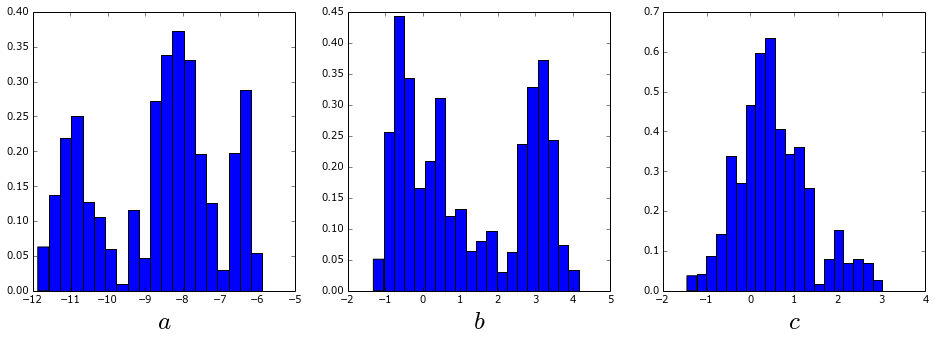

In [84]:
figure(figsize=(16, 5))
subplot(1, 3, 1)
ha = hist(A_test[10000:,0], bins=20, normed=True)
xlabel('$a$', fontsize=25)
subplot(1, 3, 2)
hb = hist(A_test[10000:,1], bins=20, normed=True)
xlabel('$b$', fontsize=25)
subplot(1, 3, 3)
hc = hist(A_test[10000:,2], bins=20, normed=True)
xlabel('$c$', fontsize=25)

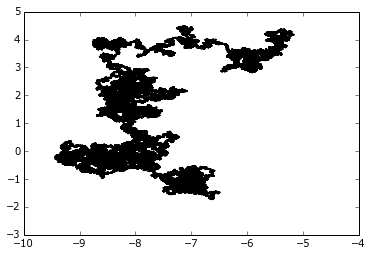

In [97]:
scatter(A_test[10000:,0], A_test[10000:,1], s=0.1)

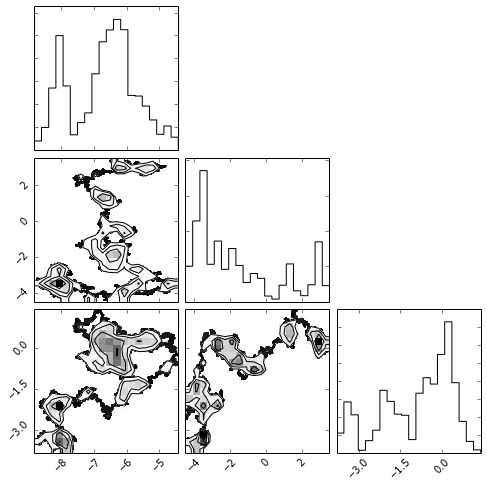

In [108]:
figure = corner.corner(A_test)

# where to start? 

- Minimize the x2 with a routine and start from there!
- What value of $\sigma_q$ choose, use your burnin phase.
- autocorrelation function and tell you how far do you have to go.
- How many points
- Accpetance ration = 30%-40%
- Never try to find convergence in the N-dimensional pase, its difficult that it converge